In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")


In [6]:
# --- Load Employee Attrition Dataset ---
attrition = pd.read_csv("C:\\Users\\harsh\\OneDrive\\Desktop\\CSV\\Employee Attrition.csv")
print("Dataset shape:", attrition.shape)
attrition.head()

# --- Preprocessing ---
attrition = attrition.dropna()
le = LabelEncoder()
for col in attrition.select_dtypes('object'):
    attrition[col] = le.fit_transform(attrition[col])

# --- Split Features/Target ---
X = X = attrition[['Age', 'MonthlyIncome', 'OverTime']]
y = attrition['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model Training ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# --- Evaluation ---
print("=== Employee Attrition Report ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Dataset shape: (1470, 35)
=== Employee Attrition Report ===
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       255
           1       0.18      0.13      0.15        39

    accuracy                           0.81       294
   macro avg       0.53      0.52      0.52       294
weighted avg       0.78      0.81      0.79       294

ROC-AUC: 0.6229260935143288


In [7]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# --- Load Fraud Detection Dataset ---
fraud = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\CSV\Fraud Detection.csv")
print("Dataset shape:", fraud.shape)

# --- Drop missing values ---
fraud = fraud.dropna()

# --- Encode categorical columns ---
le = LabelEncoder()
fraud['type'] = le.fit_transform(fraud['type'])

# --- Select only important columns ---
# Keeping only the columns that impact fraud detection
selected_features = [
    'step',
    'type',
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest',
    'isFlaggedFraud'
]

fraud = fraud[selected_features + ['isFraud']]

# --- Split data ---
X = fraud[selected_features]
y = fraud['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# --- Logistic Regression Model ---
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Evaluation ---
print("=== Fraud Detection Report ===")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

# --- Save model ---
joblib.dump(model, "fraud_model.pkl")
print("✅ Model saved as 'fraud_model.pkl'")
print("✅ Features used:", selected_features)


Dataset shape: (1048575, 11)
=== Fraud Detection Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    261864
           1       0.82      0.38      0.51       280

    accuracy                           1.00    262144
   macro avg       0.91      0.69      0.76    262144
weighted avg       1.00      1.00      1.00    262144

ROC-AUC: 0.9052384198340687
✅ Model saved as 'fraud_model.pkl'
✅ Features used: ['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']


=== Sales Forecasting RMSE: 23619.289223453263


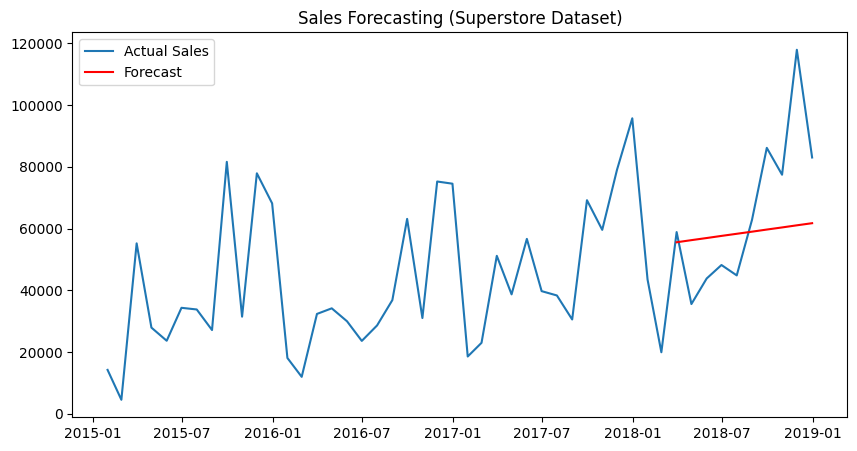

In [8]:
# --- Load Sales Dataset ---
sales = pd.read_csv(
    r"C:\Users\harsh\OneDrive\Desktop\CSV\Superstore Sales.csv",
    parse_dates=['Order Date'],
    dayfirst=True
)
# --- Aggregate by Month ---
sales_monthly = sales.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()

# --- Prepare for Forecasting ---
sales_monthly['month_num'] = np.arange(len(sales_monthly))
X = sales_monthly[['month_num']]
y = sales_monthly['Sales']

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# --- Simple Linear Regression Forecast ---
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("=== Sales Forecasting RMSE:", rmse)

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(sales_monthly['Order Date'], sales_monthly['Sales'], label="Actual Sales")
plt.plot(sales_monthly.iloc[-len(y_test):]['Order Date'], y_pred, label="Forecast", color='red')
plt.legend()
plt.title("Sales Forecasting (Superstore Dataset)")
plt.show()


In [9]:
import joblib
joblib.dump(rf, "attrition_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [10]:
import joblib
model = joblib.load("attrition_model.pkl")
print(model.feature_names_in_)


['Age' 'MonthlyIncome' 'OverTime']


In [11]:
import joblib
joblib.dump(rf, "fraud_model.pkl")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [12]:
sales.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [13]:
import joblib
joblib.dump(rf, "sales_model.pkl")
print("✅ Model saved successfully!")

✅ Model saved successfully!
